 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
pip install googlefinance

Note: you may need to restart the kernel to use updated packages.


In [25]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [26]:
# Reading whale returns
whale_returns_df = pd.read_csv("../Starter_Code/Resources/whale_returns.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [27]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [28]:
# Drop nulls
whale_returns_df.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [29]:
# Reading algorithmic returns
algo_returns_df = pd.read_csv("../Starter_Code/Resources/algo_returns.csv",index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [30]:
# Count nulls
algo_returns_df.isnull().dropna()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [31]:
# Drop nulls
algo_returns_df.dropna()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [32]:
# Reading S&P 500 Closing Prices
sp500_df=pd.read_csv("../Starter_Code/Resources/sp500_history.csv",index_col="Date", infer_datetime_format=True, parse_dates=True)
# sp500_df["Date"]=pd.to_datetime(sp500_df['Date'])
sp500_df["Close"] = sp500_df["Close"].replace({'\$': '', ',': ''}, regex=True)
sp500_df.head(5)

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [33]:
# Check Data Types
# print(sp500_df["Date"].dtypes)
print(sp500_df["Close"].dtypes)

object


In [34]:
# Fix Data Types
sp500_df["Close"]=sp500_df["Close"].astype(float)

In [35]:
# Calculate Daily Returns
sp500_df['Daily_Returns'] = sp500_df['Close'].pct_change()

In [36]:
# Drop nulls
sp500_df.dropna()

,Close,Daily_Returns
Date,,
2019-04-22,2907.97,-0.008764
2019-04-18,2905.03,-0.001011
2019-04-17,2900.45,-0.001577
2019-04-16,2907.06,0.002279
2019-04-15,2905.58,-0.000509
...,...,...
2012-10-05,1460.93,0.003469
2012-10-04,1461.40,0.000322
2012-10-03,1450.99,-0.007123


In [37]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df.rename(columns={"Close": "sp500_Close", "Daily_Returns": "sp500_daily_returns"})


,sp500_Close,sp500_daily_returns
Date,,
2019-04-23,2933.68,NaN
2019-04-22,2907.97,-0.008764
2019-04-18,2905.03,-0.001011
2019-04-17,2900.45,-0.001577
2019-04-16,2907.06,0.002279
...,...,...
2012-10-05,1460.93,0.003469
2012-10-04,1461.40,0.000322
2012-10-03,1450.99,-0.007123


In [38]:
sp500_df.head(5)

,Close,Daily_Returns
Date,,
2019-04-23,2933.68,NaN
2019-04-22,2907.97,-0.008764
2019-04-18,2905.03,-0.001011
2019-04-17,2900.45,-0.001577
2019-04-16,2907.06,0.002279


## Combine Whale, Algorithmic, and S&P 500 Returns

In [39]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
whale_returns_df
algo_returns_df
sp500_df

# Define all the different data frames into a list
combined_frames = [whale_returns_df,
              algo_returns_df,
              sp500_df]

# Concatenate all the dataframes into one
combined_df = pd.concat(combined_frames, axis=1, join='inner', ignore_index=False)
combined_df.sort_index(inplace=True)
combined_df.head()

#setting index to Date

#resetting index
# combined_df = combined_df.reset_index()
# combined_df.set_index('Date')
combined_df = combined_df.dropna()
combined_df = combined_df.drop(columns=['Close'])
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily_Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

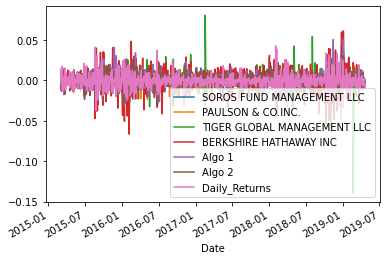

In [40]:
# Plot daily returns of all portfolios
combined_df.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

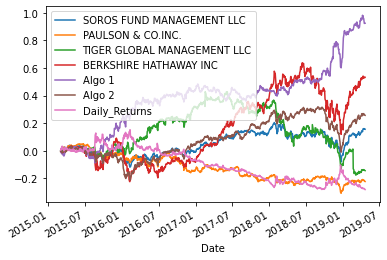

In [41]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1


# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

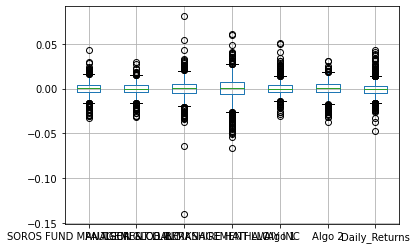

In [42]:
# Box plot to visually show risk
# plt.boxplot(combined_df)
combined_df.boxplot()

### Calculate Standard Deviations

In [43]:
# Calculate the daily standard deviations of all portfolios
volatility = combined_df.std()
volatility

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
Daily_Returns                  0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [44]:
# Determine which portfolios are riskier than the S&P 
# Berkshire hathaway inc
# tiger Global management llc

### Calculate the Annualized Standard Deviation

In [45]:
# Calculate the annualized standard deviation (252 trading days)
volatility = combined_df.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

PAULSON & CO.INC.              0.111527
Algo 1                         0.121006
SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
Daily_Returns                  0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

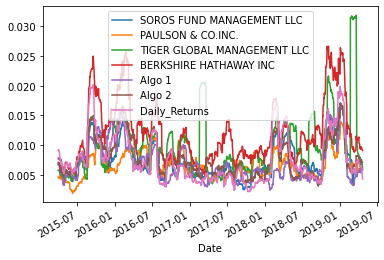

In [46]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_df= combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_df.plot()

### Calculate and plot the correlation

<AxesSubplot:>

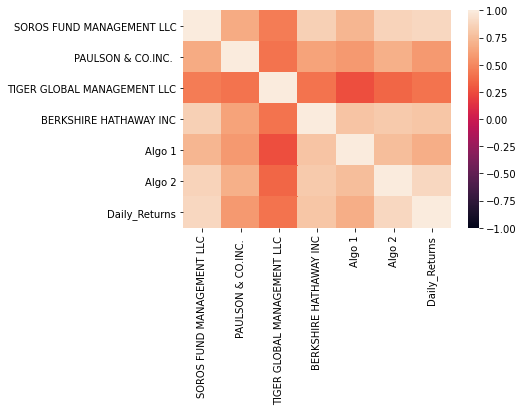

In [47]:
# Calculate the correlation
rolling_df_corr = rolling_df.corr()

# Display de correlation matrix
sns.heatmap(rolling_df_corr, vmin = -1, vmax = 1) 

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [48]:
# Calculate covariance of a single portfolio
covariance = combined_df['TIGER GLOBAL MANAGEMENT LLC'].cov(combined_df['Daily_Returns'])
print(covariance)

# Calculate variance of S&P 500
std = combined_df['Daily_Returns'].std()
variance = combined_df['Daily_Returns'].var()

print(std)
print(variance)

# Computing beta
tiger_beta = covariance / variance
print(tiger_beta)

-1.4081131271818174e-07
0.00858688974707399
7.373467552840441e-05
-0.0019097027512372758


<AxesSubplot:title={'center':'Rolling 21-Day Covariance of Tiger Wealth MGMT Returns vs. S&P 500 Returns'}, xlabel='Date'>

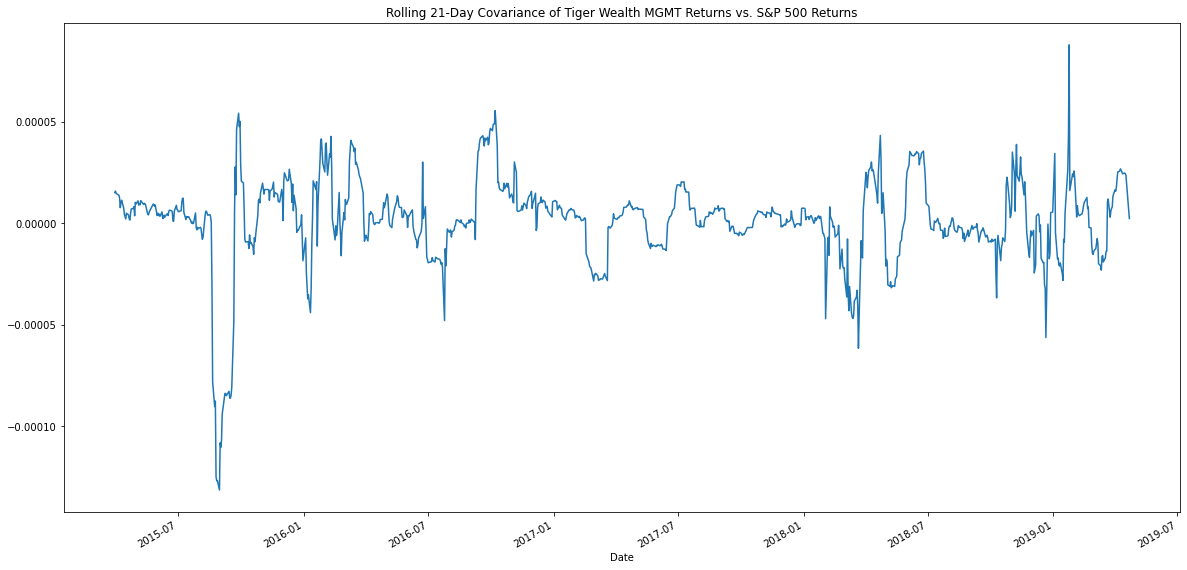

In [49]:
rolling_covariance = combined_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=21).cov(combined_df['Daily_Returns'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 21-Day Covariance of Tiger Wealth MGMT Returns vs. S&P 500 Returns')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [50]:
# Use `ewm` to calculate the rolling window
# .ewm

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [51]:
# Annualized Sharpe Ratios
mean21 = combined_df.mean()
std21 = combined_df.std()
sharpe21 = mean21/std21

<AxesSubplot:>

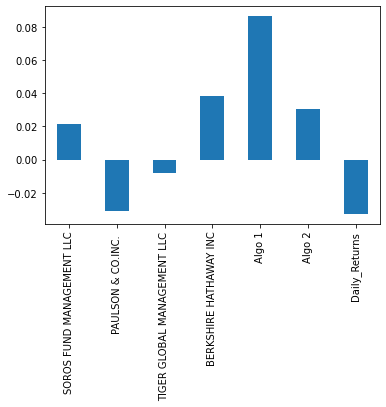

In [52]:
# Visualize the sharpe ratios as a bar plot
sharpe21.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---yes. The returns were outsized given the risk.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [53]:
# Reading data from 1st stock
AMC_df=pd.read_csv("../Starter_Code/Resources/AMC.csv",index_col="Date", infer_datetime_format=True, parse_dates=True)
AMC_df

,AMC Close
Date,
2015-05-01,30.75
2015-05-04,30.49
2015-05-05,29.97
2015-05-06,29.54
2015-05-07,29.83
...,...
2021-06-28,58.11
2021-06-29,56.43
2021-06-30,56.68


In [54]:
# Reading data from 2nd stock
Hertz_df=pd.read_csv("../Starter_Code/Resources/Hertz.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
Hertz_df

,Hertz Close
Date,
2015-05-01,77.58
2015-05-04,75.46
2015-05-05,73.63
2015-05-06,71.96
2015-05-07,71.72
...,...
2021-06-24,6.80
2021-06-25,6.75
2021-06-28,8.85


In [55]:
# Reading data from 3rd stock
Gamestop_df = pd.read_csv("../Starter_Code/Resources/Gamestop.csv", index_col="Date", infer_datetime_format= True, parse_dates=True)
Gamestop_df

,GME Close
Date,
2015-05-01,39.17
2015-05-04,40.12
2015-05-05,40.02
2015-05-06,39.13
2015-05-07,39.51
...,...
2021-06-28,213.25
2021-06-29,210.88
2021-06-30,214.14


In [56]:
# Combine all stocks in a single DataFrame
EP_portfolio = [Gamestop_df,
              Hertz_df,
                AMC_df,
              sp500_df]

ep_combined_df = pd.concat(EP_portfolio, axis=1, join='inner', ignore_index=False)
ep_combined_df.sort_index(inplace=True)
ep_combined_df=ep_combined_df.drop(columns="Close")
ep_combined_df.head()



,GME Close,Hertz Close,AMC Close,Daily_Returns
Date,,,,
2015-05-01,39.17,77.58,30.75,-0.002932
2015-05-04,40.12,75.46,30.49,0.011979
2015-05-05,40.02,73.63,29.97,0.004476
2015-05-06,39.13,71.96,29.54,-0.003760
2015-05-07,39.51,71.72,29.83,-0.013279


In [57]:
# Reset Date index
# ep_combined_df = ep_combined_df.reset_index()

In [58]:
# Reorganize portfolio data by having a column per symbol
ep_combined_df

,GME Close,Hertz Close,AMC Close,Daily_Returns
Date,,,,
2015-05-01,39.17,77.58,30.75,-0.002932
2015-05-04,40.12,75.46,30.49,0.011979
2015-05-05,40.02,73.63,29.97,0.004476
2015-05-06,39.13,71.96,29.54,-0.003760
2015-05-07,39.51,71.72,29.83,-0.013279
...,...,...,...,...
2019-04-16,9.08,15.10,16.59,0.002279
2019-04-17,8.94,14.94,16.59,-0.001577
2019-04-18,8.77,15.16,16.05,-0.001011


In [59]:
# Calculate daily returns
ep_combined_df["GME Close Change"]=ep_combined_df["GME Close"].pct_change()
ep_combined_df["Hertz Close Change"]=ep_combined_df["Hertz Close"].pct_change()
ep_combined_df["AMC Close Change"]=ep_combined_df["AMC Close"].pct_change()
ep_combined_df
# Drop NAs
ep_combined_df = ep_combined_df.dropna()
# Display sample data
ep_combined_df.head()

#returns only
ep_returns = ep_combined_df.drop(columns = ["GME Close", "Hertz Close", "AMC Close", "Daily_Returns"])


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [65]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
ep_portfolio_returns = ep_returns.dot(weights)
# Display sample data
ep_portfolio_returns.head()


Date
2015-05-04   -0.003843
2015-05-05   -0.014600
2015-05-06   -0.019756
2015-05-07    0.005398
2015-05-08    0.008020
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [71]:
# Join your returns DataFrame to the original returns DataFrame
ep_port_total_df = pd.concat([ep_returns, ep_portfolio_returns], axis=1, join ="inner", ignore_index = False)
ep_port_total_df = ep_port_total_df.rename(columns={0:"ep_portfolio"})
ep_port_total_df

,GME Close Change,Hertz Close Change,AMC Close Change,ep_portfolio
Date,,,,
2015-05-04,0.024253,-0.027327,-0.008455,-0.003843
2015-05-05,-0.002493,-0.024251,-0.017055,-0.014600
2015-05-06,-0.022239,-0.022681,-0.014348,-0.019756
2015-05-07,0.009711,-0.003335,0.009817,0.005398
2015-05-08,0.017211,0.012549,-0.005699,0.008020
...,...,...,...,...
2019-04-15,-0.040773,-0.043671,0.004260,-0.026728
2019-04-16,0.015660,-0.000662,0.005455,0.006818
2019-04-17,-0.015419,-0.010596,0.000000,-0.008672


In [72]:

# Concatenate all the dataframes into one
all_returns_df = pd.concat([ep_port_total_df,combined_df], axis=1, join='inner', ignore_index=False)
all_returns_df.sort_index(inplace=True)
all_returns_df.head()

,GME Close Change,Hertz Close Change,AMC Close Change,ep_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily_Returns
Date,,,,,,,,,,,
2015-05-04,0.024253,-0.027327,-0.008455,-0.003843,0.003133,0.000621,0.002411,0.003732,0.003171,0.001876,0.011979
2015-05-05,-0.002493,-0.024251,-0.017055,-0.014600,-0.012248,-0.003481,-0.006610,-0.014421,-0.005407,-0.008510,0.004476
2015-05-06,-0.022239,-0.022681,-0.014348,-0.019756,0.000443,-0.003400,-0.005487,-0.005900,0.006777,-0.003968,-0.003760
2015-05-07,0.009711,-0.003335,0.009817,0.005398,0.008046,0.004370,0.002094,0.007973,0.013491,0.000295,-0.013279
2015-05-08,0.017211,0.012549,-0.005699,0.008020,0.006919,0.006408,0.008641,0.005775,-0.002653,0.010462,0.005116


In [73]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns_df=all_returns_df.dropna()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [74]:
# Calculate the annualized `std`
volatility_2 = all_returns_df.std() * np.sqrt(252)
volatility_2.sort_values(inplace=True)
volatility_2

PAULSON & CO.INC.              0.112924
Algo 1                         0.121978
SOROS FUND MANAGEMENT LLC      0.126951
Algo 2                         0.133805
Daily_Returns                  0.137048
TIGER GLOBAL MANAGEMENT LLC    0.175649
BERKSHIRE HATHAWAY INC         0.208359
ep_portfolio                   0.344045
AMC Close Change               0.420308
GME Close Change               0.420724
Hertz Close Change             0.669973
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

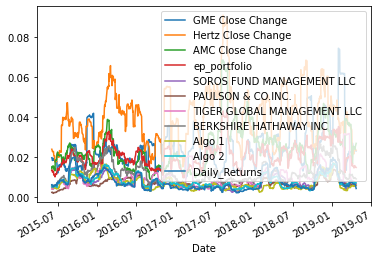

In [75]:
# Calculate rolling standard deviation
rolling_2_df= all_returns_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_2_df.plot()

### Calculate and plot the correlation

<AxesSubplot:>

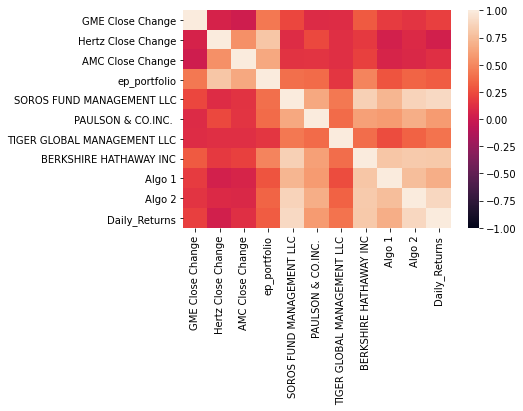

In [76]:
# Calculate and plot the correlation
rolling_2_df_corr = rolling_2_df.corr()
sns.heatmap(rolling_2_df_corr, vmin = -1, vmax = 1) 

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [77]:
# Calculate and plot Beta

covariance2 = all_returns_df['ep_portfolio'].cov(all_returns_df['Daily_Returns'])
print(covariance2)

# Calculate variance of S&P 500
std2 = all_returns_df['Daily_Returns'].std()
variance2 = all_returns_df['Daily_Returns'].var()

print(std2)
print(variance2)

# Computing beta
ep_beta = covariance2 / variance2
print(ep_beta)

4.845740208208111e-06
0.008633237133279084
7.453278339942885e-05
0.06501488321238845


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [78]:
# Calculate Annualzied Sharpe Ratios
mean21_2 = all_returns_df.mean()
std21_2 = all_returns_df.std()
sharpe21_2 = mean21_2/std21_2

<AxesSubplot:>

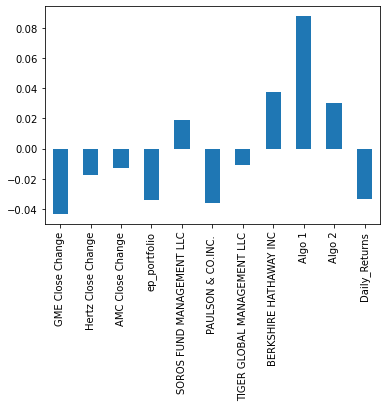

In [79]:
# Visualize the sharpe ratios as a bar plot
sharpe21_2.plot(kind="bar")

### How does your portfolio do?

Write your answer here!

In [ ]:
it is riskier than most due to consisting of highly volatile stocks